In [1]:
import os
print(os.listdir())

['.DS_Store', 'images', 'antidepressants_annual_2019_2024.csv', 'items for antidepressant drugs per.csv', 'prescriptions anaysis.ipynb', 'figures', '.ipynb_checkpoints', 'dog adoption', 'data']


In [2]:
import pandas as pd

df = pd.read_csv("items for antidepressant drugs per.csv")

df.head()


,date,id,name,y_items,y_actual_cost,x_items,x_actual_cost
0,2020-06-01,09W,NHS MEDWAY,0,0.00,0,0
1,2020-06-01,02G,NHS WEST LANCASHIRE,13055,63176.45,0,0
2,2020-06-01,05D,NHS EAST STAFFORDSHIRE,14877,67210.43,0,0
3,2020-06-01,04Y,NHS CANNOCK CHASE,15484,72912.53,0,0
4,2020-06-01,05V,NHS STAFFORD AND SURROUNDS,16783,79406.16,0,0


In [58]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['year'] = df['year'].astype(int)


In [61]:
annual = df.groupby('year')[['items','cost']].sum().reset_index()
annual


,year,items,cost
0,2020,46294523,"195,988,866"
1,2021,82222457,"268,605,792"
2,2022,84984110,"210,639,322"
3,2023,88014836,"216,252,690"
4,2024,91629896,"203,410,484"
5,2025,38547804,"79,635,508"


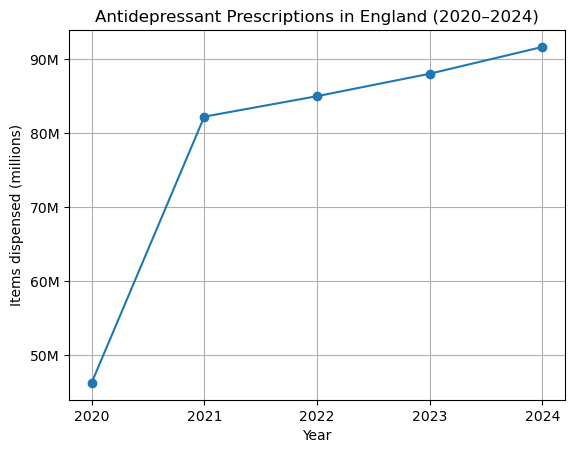

In [74]:
import matplotlib.ticker as ticker

plt.plot(annual['year'], annual['items'], marker='o')
plt.title('Antidepressant Prescriptions in England (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Items dispensed (millions)')
plt.grid(True)

# Format y-axis as millions (M)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

plt.xticks(annual['year'])
plt.savefig("figures/antidepressant_items_trend.png", dpi=300, bbox_inches='tight')
plt.show()




In [63]:
df = df.rename(columns={'y_items': 'items', 'y_actual_cost': 'cost'})


In [64]:
annual = annual[annual['year'] < 2025]


In [8]:
print(df.columns)


Index(['date', 'id', 'name', 'items', 'cost', 'x_items', 'x_actual_cost',
       'year'],
      dtype='object')


In [9]:

annual = (
    df.groupby('year')[['items','cost']]
      .sum()
      .reset_index()
      .sort_values('year')
)

annual = annual[annual['year'] < 2025].copy()

annual['avg_cost_per_item'] = annual['cost'] / annual['items']

pd.options.display.float_format = '{:,.0f}'.format
display(annual)

annual.to_csv('antidepressants_annual_2019_2024.csv', index=False)


,year,items,cost,avg_cost_per_item
0,2020,46294523,"195,988,866",4
1,2021,82222457,"268,605,792",3
2,2022,84984110,"210,639,322",2
3,2023,88014836,"216,252,690",2
4,2024,91629896,"203,410,484",2


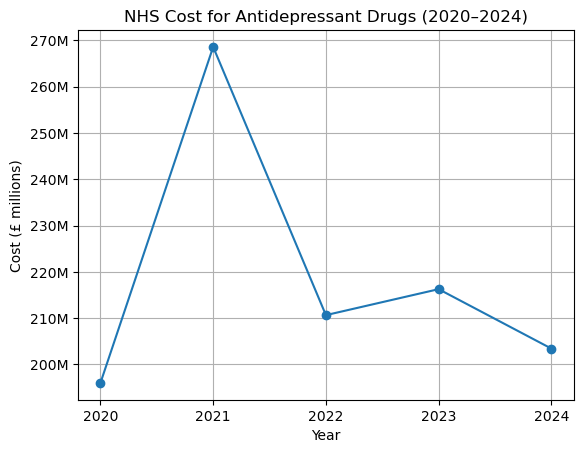

In [73]:
import matplotlib.ticker as ticker

plt.plot(annual['year'], annual['cost'], marker='o')
plt.title('NHS Cost for Antidepressant Drugs (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Cost (£ millions)')
plt.grid(True)

# Format y-axis as millions (£M)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e6)}M'))

plt.xticks(annual['year'])
plt.savefig("NHS_Cost_for_Antidepressant_Drugs_2019_2024.png", dpi=300, bbox_inches='tight')
plt.show()


In [12]:
import os
print(os.listdir())

['.DS_Store', 'images', 'antidepressants_annual_2019_2024.csv', 'items for antidepressant drugs per.csv', 'prescriptions anaysis.ipynb', 'figures', '.ipynb_checkpoints', 'dog adoption', 'data']


In [32]:
pca = pd.read_csv("Prescription Cost Analysis (PCA) from NHS Digital.csv")


In [33]:
pca = pca.rename(columns={
    'Year': 'year',
    'items dispensed': 'items',
    'net cost': 'cost'
})


In [38]:
for col in ['items','cost']:
    pca[col] = (
        pca[col].astype(str)
                .str.replace(',','')
                .str.strip()
    )
    pca[col] = pd.to_numeric(pca[col], errors='coerce')


In [39]:


import numpy as np
import pandas as pd

pca_norm = (
    pca.rename(columns={'Year':'year','items dispensed':'items','net cost':'cost'}, errors='ignore')
      [['year','items','cost']]
      .copy()
)

for col in ['year','items','cost']:
    pca_norm[col] = pd.to_numeric(pca_norm[col], errors='coerce')

pca_norm['items'] = np.where(pca_norm['items'] < 1_000_000,
                             pca_norm['items'] * 1000,
                             pca_norm['items'])

pca_norm['cost']  = np.where(pca_norm['cost'] < 10_000_000,
                             pca_norm['cost'] * 1000,
                             pca_norm['cost'])


pca_norm = pca_norm.query('2012 <= year <= 2018')


openp_norm = annual[['year','items','cost']].copy()
for col in ['year','items','cost']:
    openp_norm[col] = pd.to_numeric(openp_norm[col], errors='coerce')
openp_norm = openp_norm.query('2019 <= year <= 2024')

combined = (
    pd.concat([pca_norm, openp_norm], ignore_index=True)
      .dropna(subset=['year','items','cost'])
      .astype({'year':'int'})
      .sort_values('year')
      .reset_index(drop=True)
)

combined['avg_cost_per_item'] = combined['cost'] / combined['items']

print("Years:", list(combined['year']))
print("2012 items (expect ~50,167,000):", int(combined.loc[combined['year']==2012,'items'].iloc[0]))
print("2014 items (expect ~57,148,000):", int(combined.loc[combined['year']==2014,'items'].iloc[0]))
display(combined)


Years: [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020, 2021, 2022, 2023, 2024]
2012 items (expect ~50,167,000): 50167201
2014 items (expect ~57,148,000): 57147928


,year,items,cost,avg_cost_per_item
0,2012,"50,167,201","211,145,435",4
1,2013,"53,326,550","282,121,595",5
2,2014,"57,147,928","265,003,747",5
3,2015,"15,940,731","106,234,720",7
4,2016,"64,703,568","266,560,175",4
5,2017,"67,530,375","235,074,205",3
6,2018,"70,973,824","202,522,022",3
7,2020,"46,294,523","195,988,866",4
8,2021,"82,222,457","268,605,792",3
9,2022,"84,984,110","210,639,322",2


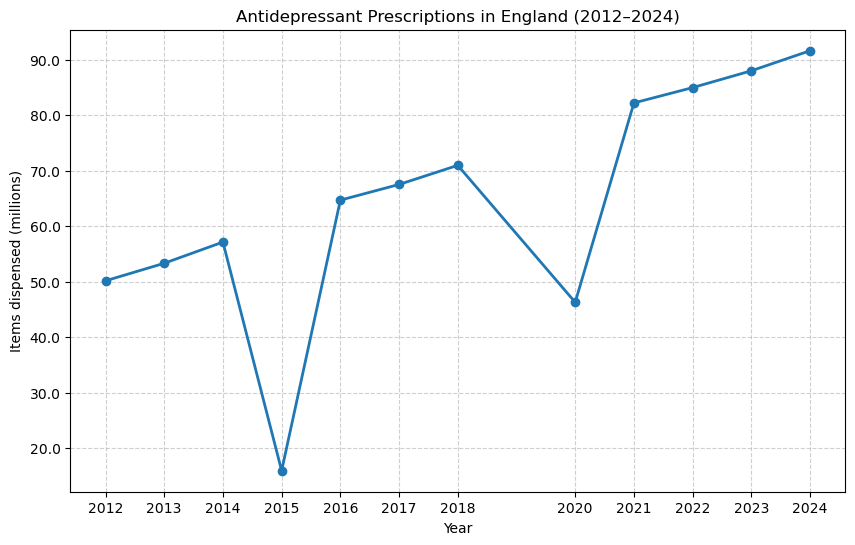

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,6))
plt.plot(to_plot['year'], to_plot['items'] / 1e6, marker='o', linewidth=2)

plt.title('Antidepressant Prescriptions in England (2012–2024)')
plt.xlabel('Year')
plt.ylabel('Items dispensed (millions)')
plt.grid(True, linestyle='--', alpha=0.6)


plt.xticks(to_plot['year'].astype(int))

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))

plt.show()



In [21]:
print(sorted(combined['year'].unique()))
print(combined.sort_values('year').head(12))


[np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
    year      items        cost  avg_cost_per_item
0   2012 50,167,201 211,145,435                  4
1   2013 53,326,550 282,121,595                  5
2   2014 57,147,928 265,003,747                  5
3   2015 15,940,731 106,234,720                  7
4   2016 64,703,568 266,560,175                  4
5   2017 67,530,375 235,074,205                  3
6   2018 70,973,824 202,522,022                  3
7   2020 46,294,523 195,988,866                  4
8   2021 82,222,457 268,605,792                  3
9   2022 84,984,110 210,639,322                  2
10  2023 88,014,836 216,252,690                  2
11  2024 91,629,896 203,410,484                  2


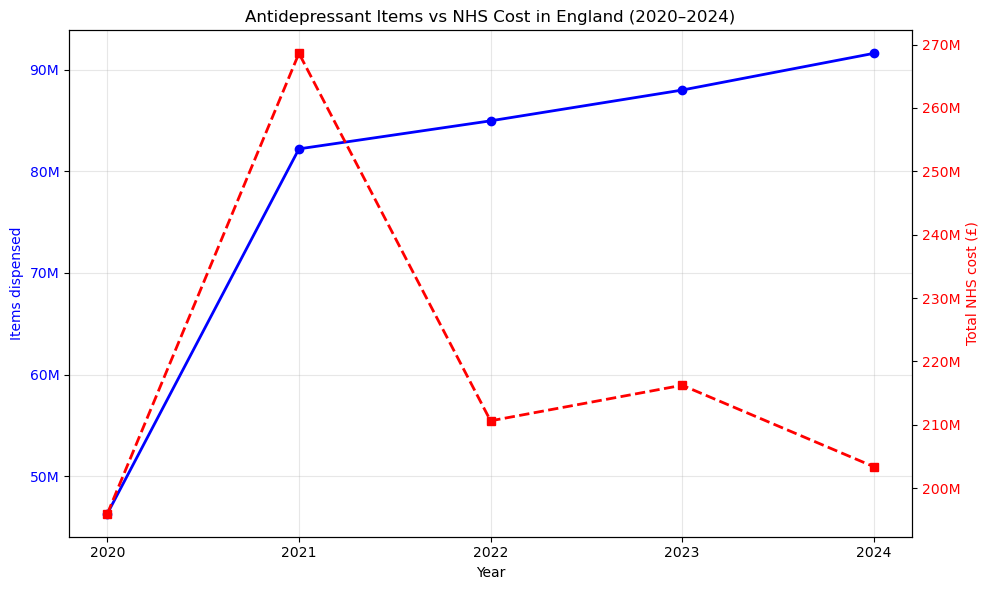

In [72]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

# select years 2012–2024
df_plot = annual[(annual['year'] >= 2012) & (annual['year'] <= 2024)].sort_values('year')

# format y-axis in millions
millions = lambda x, pos: f'{x/1_000_000:.0f}M'
fmt_millions = FuncFormatter(millions)

# figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# left axis = items
ax1.plot(df_plot['year'], df_plot['items'], marker='o', linewidth=2, color='blue', label='Items dispensed')
ax1.set_xlabel('Year')
ax1.set_ylabel('Items dispensed', color='blue')
ax1.yaxis.set_major_formatter(fmt_millions)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, alpha=0.3)

# right axis = cost
ax2 = ax1.twinx()
ax2.plot(df_plot['year'], df_plot['cost'], marker='s', linewidth=2, linestyle='--', color='red', label='NHS cost')
ax2.set_ylabel('Total NHS cost (£)', color='red')
ax2.yaxis.set_major_formatter(fmt_millions)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Antidepressant Items vs NHS Cost in England (2020–2024)')
plt.tight_layout()
plt.savefig('figures/items_vs_cost_2012_2024.png', dpi=300, bbox_inches='tight')
ax1.set_xticks(df_plot['year'])
plt.show()
